In [1]:
import numpy as np
from hipster import SpectrumPlotter

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths * 0.1) ** 2) * np.exp(-0.00002 * (wavelengths - 600) ** 2)
spectrum_plotter = SpectrumPlotter(wavelengths, figsize_in_pixel=400, return_type='plot')
plt = spectrum_plotter(spectrum)
plt

<Axes: >

In [2]:
from hipster import Reconstruction

rg = Reconstruction("../tests/models/vae_decoder.onnx")
point = np.array([[0, 0.5, 0.5]], dtype=np.float32)
spectrum = rg(point)[0][0]
wavelengths = np.arange(336, 1023, 2)
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400, return_type='plot')
plt = spectrum_plotter(spectrum)
plt

<Axes: >

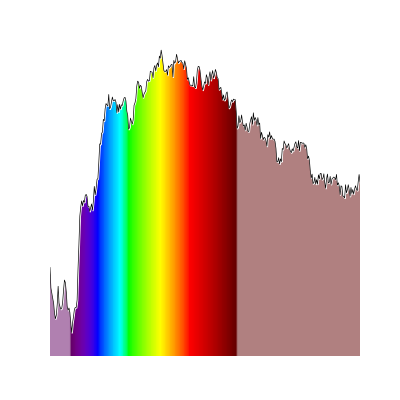

In [3]:
from PIL import Image

canvas = plt.figure.canvas
canvas.draw_idle()

# to_string_rgb is deprecated
# image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
# image = image_flat.reshape(*reversed(canvas.get_width_height()), 4)

image_flat = np.frombuffer(canvas.tostring_argb(), dtype='uint8')
image = image_flat.reshape(*reversed(canvas.get_width_height()), 4)[:,:,1:4]

image = Image.fromarray(image)
image

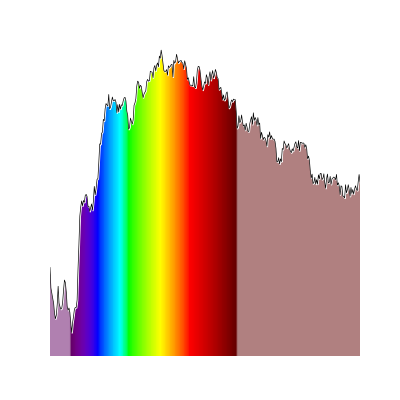

In [4]:
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400)
image = spectrum_plotter(spectrum)
image = Image.fromarray(image)
image
# image.save("test.jpg")

In [ ]:
import pandas as pd

file = "/home/doserbd/data/gaia/xp_sampled_mean_spectrum/csv/XpSampledMeanSpectrum_000000-003111.csv.gz"
gaia_sampled = pd.read_csv(file, comment='#', nrows=1)

gaia_sampled["flux"] = gaia_sampled["flux"].apply(
        lambda x: np.fromstring(x[1:-1], dtype=np.float32, sep=",")
    )
flux = gaia_sampled["flux"][0]
wavelengths = np.arange(336, 1021, 2)
flux = (flux - np.min(flux)) / (np.max(flux) - np.min(flux))
# flux = np.ones(len(wavelengths), dtype=np.float32)
np.min(flux), np.max(flux)

array([0.34322444, 0.2074411 , 0.13561088, 0.13304974, 0.14983493,
       0.1542416 , 0.16114762, 0.1858131 , 0.21842732, 0.2164798 ,
       0.15772162, 0.10347708, 0.10305411, 0.13695069, 0.16665664,
       0.17193064, 0.16593628, 0.17099306, 0.18205069, 0.1680319 ,
       0.11897434, 0.07271682, 0.06059433, 0.06220988, 0.03998173,
       0.00414497, 0.        , 0.04023492, 0.09321877, 0.12730718,
       0.14527138, 0.17381123, 0.23042741, 0.30612487, 0.36922243,
       0.3982022 , 0.39643362, 0.38687637, 0.39151856, 0.41513112,
       0.43794382, 0.43789592, 0.40689537, 0.35815135, 0.31803864,
       0.30924055, 0.33528435, 0.38435817, 0.4360336 , 0.47470173,
       0.4986903 , 0.51672465, 0.53732365, 0.5672541 , 0.60567266,
       0.6468621 , 0.6840217 , 0.7131816 , 0.7357615 , 0.7558052 ,
       0.7764197 , 0.800466  , 0.8245167 , 0.8459643 , 0.86099   ,
       0.866207  , 0.86577964, 0.8591553 , 0.85128474, 0.84466124,
       0.8391224 , 0.8334496 , 0.8276057 , 0.8170415 , 0.80432

/home/doserbd/git/HiPSter/src/hipster/wavelength_to_rgb.py:51: RuntimeWarning: invalid value encountered in scalar power
  R = (R * alpha) ** gamma


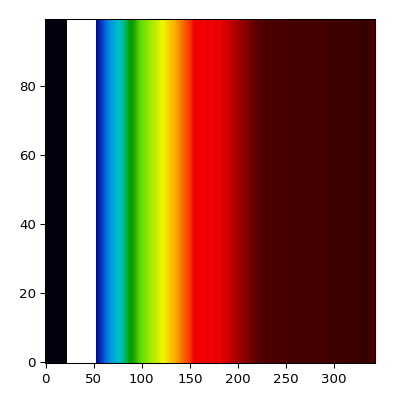

In [6]:
from hipster import AbsorptionLinePlotter

plotter = AbsorptionLinePlotter(wavelengths, figsize_in_pixel=400)
image = plotter(flux)
image = Image.fromarray(image)
image